# Health Care Analytics

### Abstract: 

### To predict the patient length of Stay into the hospital based on Patient health details and Hospital details.

##### It is a classification problem where Stay is target variable and it is updated to predict whether the patient will be in hospital for:
##### 0 - 20 days 
##### 21-30 days
##### 31-60 days
##### 60+ days


### Why solving the problem is useful ?
#### Because due to COVID pandemic Health care management is most overlooked. 
<br><b>1:</b> So purpose of solving this problem will help as patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital.</br>
<br><b>2:</b> This parameter helps hospitals to identify patients of high LOS risk (patients who will stay longer) at the time of admission. Once identified, patients with high LOS risk can have their treatment plan optimized to minimize LOS and lower the chance of staff/visitor infection. Also, prior knowledge of LOS can aid in logistics such as room and bed allocation planning</br>
<br><b>3:</b> The task is to Aaccurately predict the Length of Stay for each patient on a case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning.</br>

# From where could you get dataset ?

<b> Dataset Link: https://www.kaggle.com/vin1234/janatahack-healthcare-analytics-ii </b>

# Explanation of the dataset

#### So dataset has total 318438 records of patients along with 18 features(17 independent features and 1 target feature Stay)

#### Explaining each feature

<br><b>1: case_id = Case ID with which patient was registered in the hospital </b></br>
<br><b>2: Hospital_code = Unique code for Hospital(category)</b></br>
<br><b>3: Hospital_type_code =  Unique code for type of Hospital(category)</b></br>
<br><b>4: City_Code_Hospital =  Unique city code for each Hospital(category)</b></br>  
<br><b>5: Hospital_region_code =  Region code for each of Hospital(category)</b></br>
<br><b>6: Available Extra Rooms in Hospital = Extra Rooms available each of Hospital(integer)</b></br>
<br><b>7: Department = Department overlooking the case(category)</b></br>
<br><b>8: Ward_Type = Ward type overlooking the case(category)</b></br>
<br><b>9: Ward_Facility_Code = Ward Facility code given to each ward(category)</b></br>
<br><b>10: Bed Grade = Condition of Bed in the Ward in the Hospital(category)</b></br>
<br><b>11: patientid =Unique Patient Id</b></br>
<br><b>12: City_Code_Patient =  Unique city code for each Patient(category)</b></br>    
<br><b>13: Type of Admission =  Admission Type registered by the Hospital(category)</b></br>   
<br><b>14: Severity of Illness =  Severity of the illness recorded at the time of admission(category)</b></br>
<br><b>15: Visitors with Patient=  Number of Visitors with the patient(integer)</b></br>   
<br><b>16: Age=  Age of the patient(category)(in range 21-30,11-20)</b></br> 
<br><b>17: Admission_Deposit=  Deposit at the Admission Time(integer)</b></br> 
<br><b>18: Stay= Length of days patient stayed in the hospital (category)(in range 0-10,10-20,21-30 so on)</b></br> 

# Changing the Stay into 4 category
<br><b>0-20 days Stay </b></br>
<br><b>21-30 days Stay </b></br>
<br><b>31-60 days Stay </b></br>
<br><b>61+ days Stay </b></br>



# Using 3 Machine Learning Models
<br><b>1:Random Forest</b></br>
<br><b>2:Logistic Regression</b></br>
<br><b>3:Decision Tree</b></br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import tensorflow 
import pickle
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Embedding 
from tensorflow.keras.layers import LSTM, Flatten, concatenate, Dense, Conv1D
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dropout
#from tensorflow.keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
from sklearn.feature_extraction.text import TfidfVectorizer 
import datetime, os
from datetime import datetime

In [3]:
data=pd.read_csv('C:/Users/shwer/data/train.csv')
data.head(8)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
5,6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
6,7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10
7,8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50


In [4]:
data.shape

(318438, 18)

In [5]:
data['Stay'].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

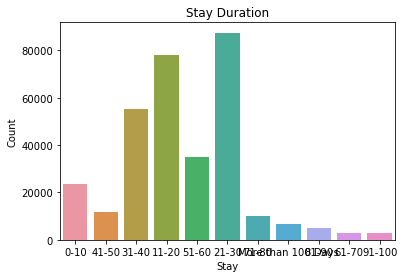

In [6]:
#Counting Hospital Stay
sns.countplot(x='Stay',data=data)
plt.xlabel("Stay")
plt.ylabel("Count")
plt.title("Stay Duration")
plt.show()

# Observations: Stay column is highly imbalanced. 

In [7]:
# Combining 0-10 and 10-20 into one as 0-20

In [8]:
def combine(dataframe,column_to_change,new_column):
    dataframe.replace(column_to_change,new_column,inplace=True)
    return dataframe

In [9]:
combine(data['Stay'],['0-10','11-20'],'0-20')

0          0-20
1         41-50
2         31-40
3         41-50
4         41-50
          ...  
318433     0-20
318434    31-40
318435     0-20
318436     0-20
318437     0-20
Name: Stay, Length: 318438, dtype: object

In [10]:
# Checking 0-10 and 10-20 combined into 0-20
data['Stay'].value_counts()

0-20                  101743
21-30                  87491
31-40                  55159
51-60                  35018
41-50                  11743
71-80                  10254
More than 100 Days      6683
81-90                   4838
91-100                  2765
61-70                   2744
Name: Stay, dtype: int64

In [11]:
combine(data['Stay'],['31-40','41-50','51-60'],'31-60')

0          0-20
1         31-60
2         31-60
3         31-60
4         31-60
          ...  
318433     0-20
318434    31-60
318435     0-20
318436     0-20
318437     0-20
Name: Stay, Length: 318438, dtype: object

In [12]:
# Checking 31-40,41-50 and 51-60 combined into 3
data['Stay'].value_counts()

31-60                 101920
0-20                  101743
21-30                  87491
71-80                  10254
More than 100 Days      6683
81-90                   4838
91-100                  2765
61-70                   2744
Name: Stay, dtype: int64

In [13]:
combine(data['Stay'],['61-70','71-80','81-90','91-100','More than 100 Days'],'60+')

0          0-20
1         31-60
2         31-60
3         31-60
4         31-60
          ...  
318433     0-20
318434    31-60
318435     0-20
318436     0-20
318437     0-20
Name: Stay, Length: 318438, dtype: object

In [14]:
# Checking rest into 60+ days stay
data['Stay'].value_counts()

31-60    101920
0-20     101743
21-30     87491
60+       27284
Name: Stay, dtype: int64

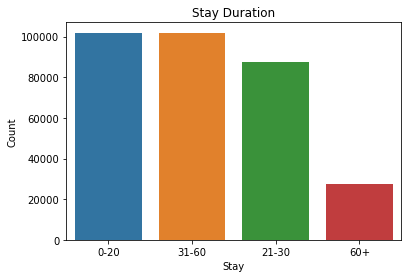

In [15]:
#Counting Hospital Stay
sns.countplot(x='Stay',data=data)
plt.xlabel("Stay")
plt.ylabel("Count")
plt.title("Stay Duration")
plt.show()

# Observations: After grouping few target labels, still data is imbalanced.

## So, performing Downsampling so that each target labels have same records

In [16]:
# As every target category has different sets of records performing downsampling
label=data['Stay']

g = data.groupby(label, group_keys=False)
data = pd.DataFrame(g.apply(lambda x: 
x.sample(g.size().min()).
reset_index(drop=True)))
data['Stay'].value_counts()

60+      27284
0-20     27284
31-60    27284
21-30    27284
Name: Stay, dtype: int64

In [17]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,142841,11,b,2,Y,4,gynecology,Q,D,3.0,11011,8.0,Urgent,Extreme,4,61-70,6124.0,0-20
1,182159,6,a,6,X,4,gynecology,Q,F,2.0,97539,8.0,Trauma,Minor,2,51-60,5155.0,0-20
2,129790,12,a,9,Y,4,gynecology,Q,B,3.0,69013,20.0,Emergency,Moderate,4,51-60,4092.0,0-20
3,134270,26,b,2,Y,5,gynecology,Q,D,2.0,108810,6.0,Emergency,Minor,4,51-60,3817.0,0-20
4,195559,19,a,7,Y,3,gynecology,Q,C,2.0,120948,8.0,Emergency,Moderate,3,41-50,3872.0,0-20


In [18]:
# Checking Hospital_type_code column different types
# Reference: https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe
def column_category(dataframe):
    a=dataframe.value_counts().rename_axis('unique_values').to_frame('counts')
    return a


In [19]:
column_category(data['Hospital_code'])

,counts
unique_values,
26,12360
23,9032
6,6875
19,6851
28,5956
11,5755
14,5722
27,4445
29,4143


In [20]:
# As it has many category we will decide to drop it and writing a function of it
def dropping_columns(dataframe,column_to_drop):
    dataframe.drop([column_to_drop],axis=1,inplace=True)
    return dataframe

In [21]:
dropping_columns(data,'Hospital_code')

,case_id,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,142841,b,2,Y,4,gynecology,Q,D,3.0,11011,8.0,Urgent,Extreme,4,61-70,6124.0,0-20
1,182159,a,6,X,4,gynecology,Q,F,2.0,97539,8.0,Trauma,Minor,2,51-60,5155.0,0-20
2,129790,a,9,Y,4,gynecology,Q,B,3.0,69013,20.0,Emergency,Moderate,4,51-60,4092.0,0-20
3,134270,b,2,Y,5,gynecology,Q,D,2.0,108810,6.0,Emergency,Minor,4,51-60,3817.0,0-20
4,195559,a,7,Y,3,gynecology,Q,C,2.0,120948,8.0,Emergency,Moderate,3,41-50,3872.0,0-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27279,113097,b,2,Y,3,gynecology,R,D,4.0,4070,8.0,Trauma,Moderate,12,41-50,5863.0,60+
27280,95776,a,7,Y,5,gynecology,S,C,2.0,6109,8.0,Trauma,Moderate,4,21-30,5832.0,60+
27281,66453,a,6,X,2,anesthesia,R,F,2.0,122167,15.0,Emergency,Moderate,9,61-70,3230.0,60+
27282,149648,c,5,Z,2,radiotherapy,Q,F,4.0,87946,5.0,Trauma,Moderate,12,61-70,5913.0,60+


In [22]:
# Checking null values
data.isnull().sum()

case_id                                 0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    1594
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [23]:
# As only 43 records are null we will drop that
data = data.dropna(axis=0, subset=['Bed Grade'])
data.isnull().sum()

case_id                                 0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                               0
patientid                               0
City_Code_Patient                    1594
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [24]:
# As City_Code_Patient is category column and has many categories we will drop that column so need to deal with null values for this column
column_category(data['City_Code_Patient'])

,counts
unique_values,
8.0,43224
2.0,12827
1.0,8813
7.0,8190
5.0,7217
4.0,5078
9.0,4023
15.0,3280
10.0,2577


In [25]:
dropping_columns(data,'City_Code_Patient')

,case_id,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,142841,b,2,Y,4,gynecology,Q,D,3.0,11011,Urgent,Extreme,4,61-70,6124.0,0-20
1,182159,a,6,X,4,gynecology,Q,F,2.0,97539,Trauma,Minor,2,51-60,5155.0,0-20
2,129790,a,9,Y,4,gynecology,Q,B,3.0,69013,Emergency,Moderate,4,51-60,4092.0,0-20
3,134270,b,2,Y,5,gynecology,Q,D,2.0,108810,Emergency,Minor,4,51-60,3817.0,0-20
4,195559,a,7,Y,3,gynecology,Q,C,2.0,120948,Emergency,Moderate,3,41-50,3872.0,0-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27279,113097,b,2,Y,3,gynecology,R,D,4.0,4070,Trauma,Moderate,12,41-50,5863.0,60+
27280,95776,a,7,Y,5,gynecology,S,C,2.0,6109,Trauma,Moderate,4,21-30,5832.0,60+
27281,66453,a,6,X,2,anesthesia,R,F,2.0,122167,Emergency,Moderate,9,61-70,3230.0,60+
27282,149648,c,5,Z,2,radiotherapy,Q,F,4.0,87946,Trauma,Moderate,12,61-70,5913.0,60+


In [26]:
# Checking categories of column Hospital_type_code
column_category(data['Hospital_type_code'])

,counts
unique_values,
a,47303
b,24606
c,16039
e,8548
d,7212
f,3780
g,1613


In [27]:
# Combining d,e,f,g categories as Others 
combine(data['Hospital_type_code'],['d','e','f','g'],'Others')

0        b
1        a
2        a
3        b
4        a
        ..
27279    b
27280    a
27281    a
27282    c
27283    a
Name: Hospital_type_code, Length: 109101, dtype: object

In [28]:
column_category(data['Hospital_type_code'])

,counts
unique_values,
a,47303
b,24606
Others,21153
c,16039


In [29]:
# Converting categorical column into numerical using Dummies and writing a function for it
def dummy_variables(dataframe,column_name):
    dataframe=pd.get_dummies(dataframe, prefix=[column_name], columns=[column_name])
    return dataframe


In [30]:
data=dummy_variables(data,'Hospital_type_code')


In [31]:
data.head()

,case_id,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Hospital_type_code_Others,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c
0,142841,2,Y,4,gynecology,Q,D,3.0,11011,Urgent,Extreme,4,61-70,6124.0,0-20,0,0,1,0
1,182159,6,X,4,gynecology,Q,F,2.0,97539,Trauma,Minor,2,51-60,5155.0,0-20,0,1,0,0
2,129790,9,Y,4,gynecology,Q,B,3.0,69013,Emergency,Moderate,4,51-60,4092.0,0-20,0,1,0,0
3,134270,2,Y,5,gynecology,Q,D,2.0,108810,Emergency,Minor,4,51-60,3817.0,0-20,0,0,1,0
4,195559,7,Y,3,gynecology,Q,C,2.0,120948,Emergency,Moderate,3,41-50,3872.0,0-20,0,1,0,0


In [32]:
# As to avoid dummy trap we will delete one dummy variable created keeping base variable and using a function to write it
def dummy_trap(dataframe,column_name_to_drop):
    dataframe.drop([column_name_to_drop], axis = 1,inplace=True) 
    return dataframe


In [33]:
dummy_trap(data,'Hospital_type_code_Others')

,case_id,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c
0,142841,2,Y,4,gynecology,Q,D,3.0,11011,Urgent,Extreme,4,61-70,6124.0,0-20,0,1,0
1,182159,6,X,4,gynecology,Q,F,2.0,97539,Trauma,Minor,2,51-60,5155.0,0-20,1,0,0
2,129790,9,Y,4,gynecology,Q,B,3.0,69013,Emergency,Moderate,4,51-60,4092.0,0-20,1,0,0
3,134270,2,Y,5,gynecology,Q,D,2.0,108810,Emergency,Minor,4,51-60,3817.0,0-20,0,1,0
4,195559,7,Y,3,gynecology,Q,C,2.0,120948,Emergency,Moderate,3,41-50,3872.0,0-20,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27279,113097,2,Y,3,gynecology,R,D,4.0,4070,Trauma,Moderate,12,41-50,5863.0,60+,0,1,0
27280,95776,7,Y,5,gynecology,S,C,2.0,6109,Trauma,Moderate,4,21-30,5832.0,60+,1,0,0
27281,66453,6,X,2,anesthesia,R,F,2.0,122167,Emergency,Moderate,9,61-70,3230.0,60+,1,0,0
27282,149648,5,Z,2,radiotherapy,Q,F,4.0,87946,Trauma,Moderate,12,61-70,5913.0,60+,0,0,1


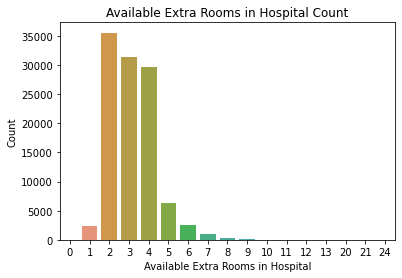

In [34]:
#Counting Available Extra Rooms in Hospital
sns.countplot(x='Available Extra Rooms in Hospital',data=data)
plt.xlabel("Available Extra Rooms in Hospital")
plt.ylabel("Count")
plt.title("Available Extra Rooms in Hospital Count")
plt.show()

# Observations: It is Skewed Positive (Towards right)

Text(0.5, 1.0, 'Operation Types Relation to Number of Stays in the Hospital')

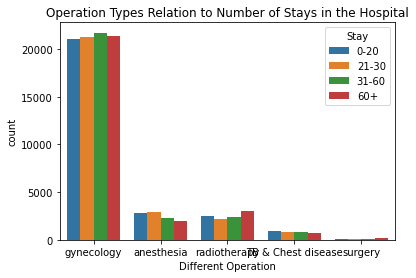

In [35]:
# Department vs Stay
# Plotting Countplot
sns.countplot(x='Department',hue='Stay',data=data)
plt.xlabel("Different Operation")
plt.title("Operation Types Relation to Number of Stays in the Hospital")

# Observations: As Gynecology has most records for each different Stay label.
### Each Different Operation type has same records for each different types of Target label i.e. Stay

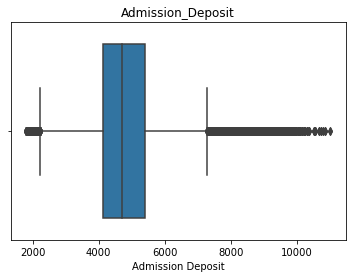

In [36]:
#Admission Deposit Price
sns.boxplot(x=data['Admission_Deposit'])
plt.xlabel("Admission Deposit")
plt.title("Admission_Deposit")
plt.show()

In [37]:
# Observations: As median 50th percentile is 4500 and there are few outliers.
### Outlier: Q3+ 1.5 *(75th percentile - 25th percentile)
### Need to remove outlier via scaling or removing

In [38]:
# Checking City_Code_Hospital category
column_category(data['City_Code_Hospital'])

,counts
unique_values,
2,18650
1,18419
6,15875
7,11296
3,10958
5,10703
9,9078
11,5956
4,4922


In [39]:
# Combining category 11,4,10,13 as Other category
combine(data['City_Code_Hospital'],[11,4,10,13],'Others')

0        2
1        6
2        9
3        2
4        7
        ..
27279    2
27280    7
27281    6
27282    5
27283    6
Name: City_Code_Hospital, Length: 109101, dtype: object

In [40]:
column_category(data['City_Code_Hospital'])

,counts
unique_values,
2,18650
1,18419
6,15875
Others,14122
7,11296
3,10958
5,10703
9,9078


In [41]:
# Creating dummies 
data=dummy_variables(data,'City_Code_Hospital')

In [42]:
data.head()

,case_id,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,...,Hospital_type_code_b,Hospital_type_code_c,City_Code_Hospital_1,City_Code_Hospital_2,City_Code_Hospital_3,City_Code_Hospital_5,City_Code_Hospital_6,City_Code_Hospital_7,City_Code_Hospital_9,City_Code_Hospital_Others
0,142841,Y,4,gynecology,Q,D,3.0,11011,Urgent,Extreme,...,1,0,0,1,0,0,0,0,0,0
1,182159,X,4,gynecology,Q,F,2.0,97539,Trauma,Minor,...,0,0,0,0,0,0,1,0,0,0
2,129790,Y,4,gynecology,Q,B,3.0,69013,Emergency,Moderate,...,0,0,0,0,0,0,0,0,1,0
3,134270,Y,5,gynecology,Q,D,2.0,108810,Emergency,Minor,...,1,0,0,1,0,0,0,0,0,0
4,195559,Y,3,gynecology,Q,C,2.0,120948,Emergency,Moderate,...,0,0,0,0,0,0,0,1,0,0


In [43]:
dummy_trap(data,'City_Code_Hospital_Others')

,case_id,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,...,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,City_Code_Hospital_1,City_Code_Hospital_2,City_Code_Hospital_3,City_Code_Hospital_5,City_Code_Hospital_6,City_Code_Hospital_7,City_Code_Hospital_9
0,142841,Y,4,gynecology,Q,D,3.0,11011,Urgent,Extreme,...,0,1,0,0,1,0,0,0,0,0
1,182159,X,4,gynecology,Q,F,2.0,97539,Trauma,Minor,...,1,0,0,0,0,0,0,1,0,0
2,129790,Y,4,gynecology,Q,B,3.0,69013,Emergency,Moderate,...,1,0,0,0,0,0,0,0,0,1
3,134270,Y,5,gynecology,Q,D,2.0,108810,Emergency,Minor,...,0,1,0,0,1,0,0,0,0,0
4,195559,Y,3,gynecology,Q,C,2.0,120948,Emergency,Moderate,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27279,113097,Y,3,gynecology,R,D,4.0,4070,Trauma,Moderate,...,0,1,0,0,1,0,0,0,0,0
27280,95776,Y,5,gynecology,S,C,2.0,6109,Trauma,Moderate,...,1,0,0,0,0,0,0,0,1,0
27281,66453,X,2,anesthesia,R,F,2.0,122167,Emergency,Moderate,...,1,0,0,0,0,0,0,1,0,0
27282,149648,Z,2,radiotherapy,Q,F,4.0,87946,Trauma,Moderate,...,0,0,1,0,0,0,1,0,0,0


In [44]:
column_category(data['Hospital_region_code'])

,counts
unique_values,
X,45172
Y,42268
Z,21661


In [45]:
# Creating dummies 
data=dummy_variables(data,'Hospital_region_code')

In [46]:
data.head()

,case_id,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,...,City_Code_Hospital_1,City_Code_Hospital_2,City_Code_Hospital_3,City_Code_Hospital_5,City_Code_Hospital_6,City_Code_Hospital_7,City_Code_Hospital_9,Hospital_region_code_X,Hospital_region_code_Y,Hospital_region_code_Z
0,142841,4,gynecology,Q,D,3.0,11011,Urgent,Extreme,4,...,0,1,0,0,0,0,0,0,1,0
1,182159,4,gynecology,Q,F,2.0,97539,Trauma,Minor,2,...,0,0,0,0,1,0,0,1,0,0
2,129790,4,gynecology,Q,B,3.0,69013,Emergency,Moderate,4,...,0,0,0,0,0,0,1,0,1,0
3,134270,5,gynecology,Q,D,2.0,108810,Emergency,Minor,4,...,0,1,0,0,0,0,0,0,1,0
4,195559,3,gynecology,Q,C,2.0,120948,Emergency,Moderate,3,...,0,0,0,0,0,1,0,0,1,0


In [47]:
dummy_trap(data,'Hospital_region_code_Z')

,case_id,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,...,Hospital_type_code_c,City_Code_Hospital_1,City_Code_Hospital_2,City_Code_Hospital_3,City_Code_Hospital_5,City_Code_Hospital_6,City_Code_Hospital_7,City_Code_Hospital_9,Hospital_region_code_X,Hospital_region_code_Y
0,142841,4,gynecology,Q,D,3.0,11011,Urgent,Extreme,4,...,0,0,1,0,0,0,0,0,0,1
1,182159,4,gynecology,Q,F,2.0,97539,Trauma,Minor,2,...,0,0,0,0,0,1,0,0,1,0
2,129790,4,gynecology,Q,B,3.0,69013,Emergency,Moderate,4,...,0,0,0,0,0,0,0,1,0,1
3,134270,5,gynecology,Q,D,2.0,108810,Emergency,Minor,4,...,0,0,1,0,0,0,0,0,0,1
4,195559,3,gynecology,Q,C,2.0,120948,Emergency,Moderate,3,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27279,113097,3,gynecology,R,D,4.0,4070,Trauma,Moderate,12,...,0,0,1,0,0,0,0,0,0,1
27280,95776,5,gynecology,S,C,2.0,6109,Trauma,Moderate,4,...,0,0,0,0,0,0,1,0,0,1
27281,66453,2,anesthesia,R,F,2.0,122167,Emergency,Moderate,9,...,0,0,0,0,0,1,0,0,1,0
27282,149648,2,radiotherapy,Q,F,4.0,87946,Trauma,Moderate,12,...,1,0,0,0,1,0,0,0,0,0


In [48]:
column_category(data['Department'])

,counts
unique_values,
gynecology,85376
radiotherapy,10100
anesthesia,9919
TB & Chest disease,3236
surgery,470


In [49]:
combine(data['Department'],['TB & Chest disease','surgery'],'Others')

0          gynecology
1          gynecology
2          gynecology
3          gynecology
4          gynecology
             ...     
27279      gynecology
27280      gynecology
27281      anesthesia
27282    radiotherapy
27283      anesthesia
Name: Department, Length: 109101, dtype: object

In [50]:
# Combining TB and Chest diesease and surgery as Others for Department
column_category(data['Department'])

,counts
unique_values,
gynecology,85376
radiotherapy,10100
anesthesia,9919
Others,3706


In [51]:
# Creating dummies 
data=dummy_variables(data,'Department')

In [52]:
data.head()

,case_id,Available Extra Rooms in Hospital,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,...,City_Code_Hospital_5,City_Code_Hospital_6,City_Code_Hospital_7,City_Code_Hospital_9,Hospital_region_code_X,Hospital_region_code_Y,Department_Others,Department_anesthesia,Department_gynecology,Department_radiotherapy
0,142841,4,Q,D,3.0,11011,Urgent,Extreme,4,61-70,...,0,0,0,0,0,1,0,0,1,0
1,182159,4,Q,F,2.0,97539,Trauma,Minor,2,51-60,...,0,1,0,0,1,0,0,0,1,0
2,129790,4,Q,B,3.0,69013,Emergency,Moderate,4,51-60,...,0,0,0,1,0,1,0,0,1,0
3,134270,5,Q,D,2.0,108810,Emergency,Minor,4,51-60,...,0,0,0,0,0,1,0,0,1,0
4,195559,3,Q,C,2.0,120948,Emergency,Moderate,3,41-50,...,0,0,1,0,0,1,0,0,1,0


In [53]:
dummy_trap(data,'Department_Others')

,case_id,Available Extra Rooms in Hospital,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,...,City_Code_Hospital_3,City_Code_Hospital_5,City_Code_Hospital_6,City_Code_Hospital_7,City_Code_Hospital_9,Hospital_region_code_X,Hospital_region_code_Y,Department_anesthesia,Department_gynecology,Department_radiotherapy
0,142841,4,Q,D,3.0,11011,Urgent,Extreme,4,61-70,...,0,0,0,0,0,0,1,0,1,0
1,182159,4,Q,F,2.0,97539,Trauma,Minor,2,51-60,...,0,0,1,0,0,1,0,0,1,0
2,129790,4,Q,B,3.0,69013,Emergency,Moderate,4,51-60,...,0,0,0,0,1,0,1,0,1,0
3,134270,5,Q,D,2.0,108810,Emergency,Minor,4,51-60,...,0,0,0,0,0,0,1,0,1,0
4,195559,3,Q,C,2.0,120948,Emergency,Moderate,3,41-50,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27279,113097,3,R,D,4.0,4070,Trauma,Moderate,12,41-50,...,0,0,0,0,0,0,1,0,1,0
27280,95776,5,S,C,2.0,6109,Trauma,Moderate,4,21-30,...,0,0,0,1,0,0,1,0,1,0
27281,66453,2,R,F,2.0,122167,Emergency,Moderate,9,61-70,...,0,0,1,0,0,1,0,1,0,0
27282,149648,2,Q,F,4.0,87946,Trauma,Moderate,12,61-70,...,0,1,0,0,0,0,0,0,0,1


In [54]:
column_category(data['Ward_Type'])

,counts
unique_values,
R,43268
Q,33864
S,29876
P,1572
T,519
U,2


In [55]:
combine(data['Ward_Type'],['P','T','U'],'Others')

0        Q
1        Q
2        Q
3        Q
4        Q
        ..
27279    R
27280    S
27281    R
27282    Q
27283    R
Name: Ward_Type, Length: 109101, dtype: object

In [56]:
column_category(data['Ward_Type'])

,counts
unique_values,
R,43268
Q,33864
S,29876
Others,2093


In [57]:
# Creating dummies 
data=dummy_variables(data,'Ward_Type')

In [58]:
data.head()

,case_id,Available Extra Rooms in Hospital,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,...,City_Code_Hospital_9,Hospital_region_code_X,Hospital_region_code_Y,Department_anesthesia,Department_gynecology,Department_radiotherapy,Ward_Type_Others,Ward_Type_Q,Ward_Type_R,Ward_Type_S
0,142841,4,D,3.0,11011,Urgent,Extreme,4,61-70,6124.0,...,0,0,1,0,1,0,0,1,0,0
1,182159,4,F,2.0,97539,Trauma,Minor,2,51-60,5155.0,...,0,1,0,0,1,0,0,1,0,0
2,129790,4,B,3.0,69013,Emergency,Moderate,4,51-60,4092.0,...,1,0,1,0,1,0,0,1,0,0
3,134270,5,D,2.0,108810,Emergency,Minor,4,51-60,3817.0,...,0,0,1,0,1,0,0,1,0,0
4,195559,3,C,2.0,120948,Emergency,Moderate,3,41-50,3872.0,...,0,0,1,0,1,0,0,1,0,0


In [59]:
dummy_trap(data,'Ward_Type_Others')

,case_id,Available Extra Rooms in Hospital,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,...,City_Code_Hospital_7,City_Code_Hospital_9,Hospital_region_code_X,Hospital_region_code_Y,Department_anesthesia,Department_gynecology,Department_radiotherapy,Ward_Type_Q,Ward_Type_R,Ward_Type_S
0,142841,4,D,3.0,11011,Urgent,Extreme,4,61-70,6124.0,...,0,0,0,1,0,1,0,1,0,0
1,182159,4,F,2.0,97539,Trauma,Minor,2,51-60,5155.0,...,0,0,1,0,0,1,0,1,0,0
2,129790,4,B,3.0,69013,Emergency,Moderate,4,51-60,4092.0,...,0,1,0,1,0,1,0,1,0,0
3,134270,5,D,2.0,108810,Emergency,Minor,4,51-60,3817.0,...,0,0,0,1,0,1,0,1,0,0
4,195559,3,C,2.0,120948,Emergency,Moderate,3,41-50,3872.0,...,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27279,113097,3,D,4.0,4070,Trauma,Moderate,12,41-50,5863.0,...,0,0,0,1,0,1,0,0,1,0
27280,95776,5,C,2.0,6109,Trauma,Moderate,4,21-30,5832.0,...,1,0,0,1,0,1,0,0,0,1
27281,66453,2,F,2.0,122167,Emergency,Moderate,9,61-70,3230.0,...,0,0,1,0,1,0,0,0,1,0
27282,149648,2,F,4.0,87946,Trauma,Moderate,12,61-70,5913.0,...,0,0,0,0,0,0,1,1,0,0


In [60]:
column_category(data['Ward_Facility_Code'])

,counts
unique_values,
F,38672
D,18650
E,18419
B,12322
C,11296
A,9742


In [61]:
# Creating dummies 
data=dummy_variables(data,'Ward_Facility_Code')

In [62]:
data.head()

,case_id,Available Extra Rooms in Hospital,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,...,Department_radiotherapy,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Facility_Code_A,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F
0,142841,4,3.0,11011,Urgent,Extreme,4,61-70,6124.0,0-20,...,0,1,0,0,0,0,0,1,0,0
1,182159,4,2.0,97539,Trauma,Minor,2,51-60,5155.0,0-20,...,0,1,0,0,0,0,0,0,0,1
2,129790,4,3.0,69013,Emergency,Moderate,4,51-60,4092.0,0-20,...,0,1,0,0,0,1,0,0,0,0
3,134270,5,2.0,108810,Emergency,Minor,4,51-60,3817.0,0-20,...,0,1,0,0,0,0,0,1,0,0
4,195559,3,2.0,120948,Emergency,Moderate,3,41-50,3872.0,0-20,...,0,1,0,0,0,0,1,0,0,0


In [63]:
dummy_trap(data,'Ward_Facility_Code_A')

,case_id,Available Extra Rooms in Hospital,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,...,Department_gynecology,Department_radiotherapy,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F
0,142841,4,3.0,11011,Urgent,Extreme,4,61-70,6124.0,0-20,...,1,0,1,0,0,0,0,1,0,0
1,182159,4,2.0,97539,Trauma,Minor,2,51-60,5155.0,0-20,...,1,0,1,0,0,0,0,0,0,1
2,129790,4,3.0,69013,Emergency,Moderate,4,51-60,4092.0,0-20,...,1,0,1,0,0,1,0,0,0,0
3,134270,5,2.0,108810,Emergency,Minor,4,51-60,3817.0,0-20,...,1,0,1,0,0,0,0,1,0,0
4,195559,3,2.0,120948,Emergency,Moderate,3,41-50,3872.0,0-20,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27279,113097,3,4.0,4070,Trauma,Moderate,12,41-50,5863.0,60+,...,1,0,0,1,0,0,0,1,0,0
27280,95776,5,2.0,6109,Trauma,Moderate,4,21-30,5832.0,60+,...,1,0,0,0,1,0,1,0,0,0
27281,66453,2,2.0,122167,Emergency,Moderate,9,61-70,3230.0,60+,...,0,0,0,1,0,0,0,0,0,1
27282,149648,2,4.0,87946,Trauma,Moderate,12,61-70,5913.0,60+,...,0,1,1,0,0,0,0,0,0,1


Text(0.5, 1.0, 'Bed Condition Relation to Number of Stays in the Hospital')

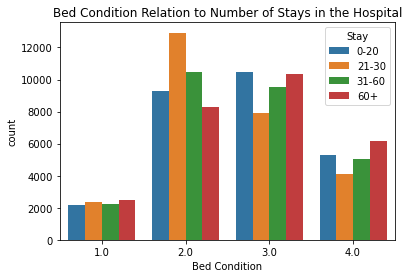

In [64]:
# Bedgrade vs Stay
# Plotting Countplot
sns.countplot(x='Bed Grade',hue='Stay',data=data)
plt.xlabel("Bed Condition")
plt.title("Bed Condition Relation to Number of Stays in the Hospital")

# Observations: Bed Grade 2 has most records, maximum hospital bed condition is 2,3 . Few records have bad bed grade i.e. 1

In [65]:
column_category(data['Bed Grade'])

,counts
unique_values,
2.0,40959
3.0,38331
4.0,20564
1.0,9247


In [66]:
# As it is having logical order i.e use label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Bed Grade']=le.fit_transform(data['Bed Grade'])
data.head()

,case_id,Available Extra Rooms in Hospital,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,...,Department_gynecology,Department_radiotherapy,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F
0,142841,4,2,11011,Urgent,Extreme,4,61-70,6124.0,0-20,...,1,0,1,0,0,0,0,1,0,0
1,182159,4,1,97539,Trauma,Minor,2,51-60,5155.0,0-20,...,1,0,1,0,0,0,0,0,0,1
2,129790,4,2,69013,Emergency,Moderate,4,51-60,4092.0,0-20,...,1,0,1,0,0,1,0,0,0,0
3,134270,5,1,108810,Emergency,Minor,4,51-60,3817.0,0-20,...,1,0,1,0,0,0,0,1,0,0
4,195559,3,1,120948,Emergency,Moderate,3,41-50,3872.0,0-20,...,1,0,1,0,0,0,1,0,0,0


In [67]:
column_category(data['Type of Admission'])

,counts
unique_values,
Trauma,53429
Emergency,39716
Urgent,15956


Text(0.5, 1.0, 'Type of Admission Relation to Number of Stays in the Hospital')

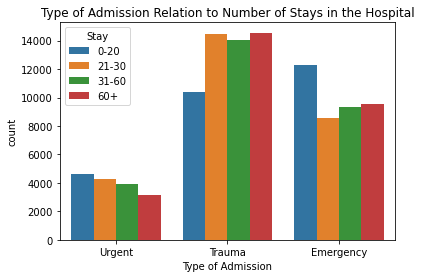

In [68]:
# Admission type vs Stay
# Plotting Countplot
sns.countplot(x='Type of Admission',hue='Stay',data=data)
plt.xlabel("Type of Admission")
plt.title("Type of Admission Relation to Number of Stays in the Hospital")

In [69]:
# Observation: Trauma cases are high.

In [70]:
# Creating dummies 
data=dummy_variables(data,'Type of Admission')

In [71]:
dummy_trap(data,'Type of Admission_Trauma')

,case_id,Available Extra Rooms in Hospital,Bed Grade,patientid,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Hospital_type_code_a,...,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Emergency,Type of Admission_Urgent
0,142841,4,2,11011,Extreme,4,61-70,6124.0,0-20,0,...,1,0,0,0,0,1,0,0,0,1
1,182159,4,1,97539,Minor,2,51-60,5155.0,0-20,1,...,1,0,0,0,0,0,0,1,0,0
2,129790,4,2,69013,Moderate,4,51-60,4092.0,0-20,1,...,1,0,0,1,0,0,0,0,1,0
3,134270,5,1,108810,Minor,4,51-60,3817.0,0-20,0,...,1,0,0,0,0,1,0,0,1,0
4,195559,3,1,120948,Moderate,3,41-50,3872.0,0-20,1,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27279,113097,3,3,4070,Moderate,12,41-50,5863.0,60+,0,...,0,1,0,0,0,1,0,0,0,0
27280,95776,5,1,6109,Moderate,4,21-30,5832.0,60+,1,...,0,0,1,0,1,0,0,0,0,0
27281,66453,2,1,122167,Moderate,9,61-70,3230.0,60+,1,...,0,1,0,0,0,0,0,1,1,0
27282,149648,2,3,87946,Moderate,12,61-70,5913.0,60+,0,...,1,0,0,0,0,0,0,1,0,0


Text(0.5, 1.0, 'Severity of Illness Relation to Number of Stays in the Hospital')

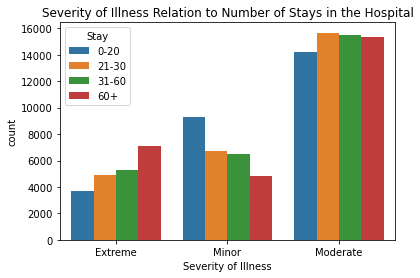

In [72]:
#  Severity of Illness vs Stay
# Plotting Countplot
sns.countplot(x='Severity of Illness',hue='Stay',data=data)
plt.xlabel("Severity of Illness")
plt.title("Severity of Illness Relation to Number of Stays in the Hospital")

In [73]:
# Observation: Majority of the cases are moderate.

In [74]:
column_category(data['Severity of Illness'])

,counts
unique_values,
Moderate,60766
Minor,27322
Extreme,21013


In [75]:
# Creating a column where Minor=0,Moderate=1 and Extreme=2
# Reference: https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
# create a list of our conditions
conditions=[
    (data['Severity of Illness']=='Minor'),
    (data['Severity of Illness']=='Moderate'),
    (data['Severity of Illness']=='Extreme')
]

# create a list of the values we want to assign for each condition
values=[0,1,2]
# create a new column and use np.select to assign values to it using our lists as arguments
data['Severity']=np.select(conditions,values)

data.head()

,case_id,Available Extra Rooms in Hospital,Bed Grade,patientid,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Hospital_type_code_a,...,Ward_Type_R,Ward_Type_S,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Emergency,Type of Admission_Urgent,Severity
0,142841,4,2,11011,Extreme,4,61-70,6124.0,0-20,0,...,0,0,0,0,1,0,0,0,1,2
1,182159,4,1,97539,Minor,2,51-60,5155.0,0-20,1,...,0,0,0,0,0,0,1,0,0,0
2,129790,4,2,69013,Moderate,4,51-60,4092.0,0-20,1,...,0,0,1,0,0,0,0,1,0,1
3,134270,5,1,108810,Minor,4,51-60,3817.0,0-20,0,...,0,0,0,0,1,0,0,1,0,0
4,195559,3,1,120948,Moderate,3,41-50,3872.0,0-20,1,...,0,0,0,1,0,0,0,1,0,1


In [76]:
# Dropping column Severity of Illness
dropping_columns(data,'Severity of Illness')

,case_id,Available Extra Rooms in Hospital,Bed Grade,patientid,Visitors with Patient,Age,Admission_Deposit,Stay,Hospital_type_code_a,Hospital_type_code_b,...,Ward_Type_R,Ward_Type_S,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Emergency,Type of Admission_Urgent,Severity
0,142841,4,2,11011,4,61-70,6124.0,0-20,0,1,...,0,0,0,0,1,0,0,0,1,2
1,182159,4,1,97539,2,51-60,5155.0,0-20,1,0,...,0,0,0,0,0,0,1,0,0,0
2,129790,4,2,69013,4,51-60,4092.0,0-20,1,0,...,0,0,1,0,0,0,0,1,0,1
3,134270,5,1,108810,4,51-60,3817.0,0-20,0,1,...,0,0,0,0,1,0,0,1,0,0
4,195559,3,1,120948,3,41-50,3872.0,0-20,1,0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27279,113097,3,3,4070,12,41-50,5863.0,60+,0,1,...,1,0,0,0,1,0,0,0,0,1
27280,95776,5,1,6109,4,21-30,5832.0,60+,1,0,...,0,1,0,1,0,0,0,0,0,1
27281,66453,2,1,122167,9,61-70,3230.0,60+,1,0,...,1,0,0,0,0,0,1,1,0,1
27282,149648,2,3,87946,12,61-70,5913.0,60+,0,0,...,0,0,0,0,0,0,1,0,0,1


In [77]:
column_category(data['Age'])

,counts
unique_values,
41-50,21787
31-40,21194
51-60,16998
21-30,13396
71-80,12761
61-70,12055
11-20,5234
81-90,3100
0-10,2088


Text(0.5, 1.0, 'Age Relation to Number of Stays in the Hospital')

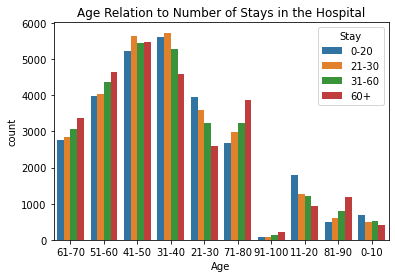

In [78]:
#  Age of Illness vs Stay
# Plotting Countplot
sns.countplot(x='Age',hue='Stay',data=data)
plt.xlabel("Age")
plt.title("Age Relation to Number of Stays in the Hospital")

# Observations: Majority of the cases age are from 21 - 80. Of which 30-50 are have most of the cases

In [79]:
# Combining 0-10 and 11-20 as 0-20 Age group
combine(data['Age'],['0-10','11-20'],'0-20')

0        61-70
1        51-60
2        51-60
3        51-60
4        41-50
         ...  
27279    41-50
27280    21-30
27281    61-70
27282    61-70
27283     0-20
Name: Age, Length: 109101, dtype: object

In [80]:
# Combining 81-90 and 91-100 as 81-100 Age Group
combine(data['Age'],['81-90','91-100'],'81-100')

0        61-70
1        51-60
2        51-60
3        51-60
4        41-50
         ...  
27279    41-50
27280    21-30
27281    61-70
27282    61-70
27283     0-20
Name: Age, Length: 109101, dtype: object

In [81]:
column_category(data['Age'])

,counts
unique_values,
41-50,21787
31-40,21194
51-60,16998
21-30,13396
71-80,12761
61-70,12055
0-20,7322
81-100,3588


In [82]:
# create a list of our conditions
conditions=[
    (data['Age']=='41-50'),
    (data['Age']=='31-40'),
    (data['Age']=='51-60'),
    (data['Age']=='21-30'),
    (data['Age']=='71-80'),
    (data['Age']=='61-70'),
    (data['Age']=='0-20'),
    (data['Age']=='81-100'),
    
    
    
]

# create a list of the values we want to assign for each condition
lower_values=[41,31,51,21,71,61,0,81]
higher_values=[50,40,60,30,80,70,20,100]
mid_values=[45,35,55,25,75,65,10,90]
# create a new column and use np.select to assign values to it using our lists as arguments
data['lower_Age']=np.select(conditions,lower_values)
data['Upper_Age']=np.select(conditions,higher_values)
data['Mid_Age']=np.select(conditions,mid_values)
data.head()

,case_id,Available Extra Rooms in Hospital,Bed Grade,patientid,Visitors with Patient,Age,Admission_Deposit,Stay,Hospital_type_code_a,Hospital_type_code_b,...,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Emergency,Type of Admission_Urgent,Severity,lower_Age,Upper_Age,Mid_Age
0,142841,4,2,11011,4,61-70,6124.0,0-20,0,1,...,0,1,0,0,0,1,2,61,70,65
1,182159,4,1,97539,2,51-60,5155.0,0-20,1,0,...,0,0,0,1,0,0,0,51,60,55
2,129790,4,2,69013,4,51-60,4092.0,0-20,1,0,...,0,0,0,0,1,0,1,51,60,55
3,134270,5,1,108810,4,51-60,3817.0,0-20,0,1,...,0,1,0,0,1,0,0,51,60,55
4,195559,3,1,120948,3,41-50,3872.0,0-20,1,0,...,1,0,0,0,1,0,1,41,50,45


In [83]:
dropping_columns(data,'Age')

,case_id,Available Extra Rooms in Hospital,Bed Grade,patientid,Visitors with Patient,Admission_Deposit,Stay,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,...,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Emergency,Type of Admission_Urgent,Severity,lower_Age,Upper_Age,Mid_Age
0,142841,4,2,11011,4,6124.0,0-20,0,1,0,...,0,1,0,0,0,1,2,61,70,65
1,182159,4,1,97539,2,5155.0,0-20,1,0,0,...,0,0,0,1,0,0,0,51,60,55
2,129790,4,2,69013,4,4092.0,0-20,1,0,0,...,0,0,0,0,1,0,1,51,60,55
3,134270,5,1,108810,4,3817.0,0-20,0,1,0,...,0,1,0,0,1,0,0,51,60,55
4,195559,3,1,120948,3,3872.0,0-20,1,0,0,...,1,0,0,0,1,0,1,41,50,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27279,113097,3,3,4070,12,5863.0,60+,0,1,0,...,0,1,0,0,0,0,1,41,50,45
27280,95776,5,1,6109,4,5832.0,60+,1,0,0,...,1,0,0,0,0,0,1,21,30,25
27281,66453,2,1,122167,9,3230.0,60+,1,0,0,...,0,0,0,1,1,0,1,61,70,65
27282,149648,2,3,87946,12,5913.0,60+,0,0,1,...,0,0,0,1,0,0,1,61,70,65


In [84]:
# Converting target label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Stay']=le.fit_transform(data['Stay'])
data.head()

,case_id,Available Extra Rooms in Hospital,Bed Grade,patientid,Visitors with Patient,Admission_Deposit,Stay,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,...,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Emergency,Type of Admission_Urgent,Severity,lower_Age,Upper_Age,Mid_Age
0,142841,4,2,11011,4,6124.0,0,0,1,0,...,0,1,0,0,0,1,2,61,70,65
1,182159,4,1,97539,2,5155.0,0,1,0,0,...,0,0,0,1,0,0,0,51,60,55
2,129790,4,2,69013,4,4092.0,0,1,0,0,...,0,0,0,0,1,0,1,51,60,55
3,134270,5,1,108810,4,3817.0,0,0,1,0,...,0,1,0,0,1,0,0,51,60,55
4,195559,3,1,120948,3,3872.0,0,1,0,0,...,1,0,0,0,1,0,1,41,50,45


In [85]:
# Feature Engineering
data['Bill_per_patient'] = data.groupby('patientid')['Admission_Deposit'].transform('sum')


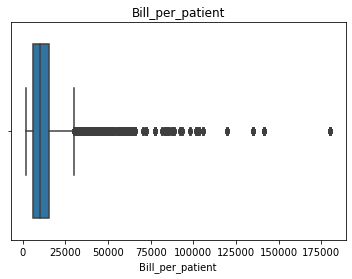

In [86]:
#Bill Per Patient
sns.boxplot(x=data['Bill_per_patient'])
plt.xlabel("Bill_per_patient")
plt.title("Bill_per_patient")
plt.show()

# Observations: Lot of Outlier so perform scaling to handle outliers

REFERENCE: https://stats.stackexchange.com/questions/266267/should-one-be-concerned-about-multi-collinearity-when-using-non-linear-models

In [87]:
# case id and patientid have many unique values so we are dropping these columns

In [88]:
data1=data.drop(['case_id', 'patientid', 'lower_Age','Upper_Age'], axis = 1) 

In [89]:
data1.head()

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,Stay,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,City_Code_Hospital_1,City_Code_Hospital_2,...,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Emergency,Type of Admission_Urgent,Severity,Mid_Age,Bill_per_patient
0,4,2,4,6124.0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,2,65,24122.0
1,4,1,2,5155.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,55,10244.0
2,4,2,4,4092.0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,55,8703.0
3,5,1,4,3817.0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,55,9406.0
4,3,1,3,3872.0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,45,18959.0


In [90]:
# Scaling Columns to remove outlier
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
data1[['Admission_Deposit']] = mm_scaler.fit_transform(data1[['Admission_Deposit']])
data1[['Bill_per_patient']] = mm_scaler.fit_transform(data1[['Bill_per_patient']])
data1[['Available Extra Rooms in Hospital']] = mm_scaler.fit_transform(data1[['Available Extra Rooms in Hospital']])
data1[['Visitors with Patient']] = mm_scaler.fit_transform(data1[['Visitors with Patient']])

In [91]:
X=data1.drop('Stay', axis=1)
y=data1['Stay'].values
X.head()

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,City_Code_Hospital_1,City_Code_Hospital_2,City_Code_Hospital_3,...,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Emergency,Type of Admission_Urgent,Severity,Mid_Age,Bill_per_patient
0,0.166667,2,0.12500,0.469592,0,1,0,0,1,0,...,0,0,1,0,0,0,1,2,65,0.125081
1,0.166667,1,0.06250,0.364357,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,55,0.047312
2,0.166667,2,0.12500,0.248914,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,55,0.038677
3,0.208333,1,0.12500,0.219049,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,55,0.042616
4,0.125000,1,0.09375,0.225022,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,45,0.096149


# Splitting the data train and test

In [91]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [92]:
X_train

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,City_Code_Hospital_1,City_Code_Hospital_2,City_Code_Hospital_3,...,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Emergency,Type of Admission_Urgent,Severity,Mid_Age,Bill_per_patient
24437,0.190476,3,0.18750,0.620720,0,0,1,0,0,0,...,0,0,0,0,1,1,0,1,75,0.130559
1105,0.095238,1,0.18750,0.242526,0,1,0,0,1,0,...,0,0,1,0,0,1,0,1,55,0.107478
22009,0.190476,1,0.06250,0.190021,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,35,0.062228
16799,0.238095,3,0.75000,0.041635,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,25,0.002198
4785,0.190476,2,0.34375,0.777911,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,65,0.172822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0.142857,2,0.06250,0.349386,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,35,0.018749
22077,0.190476,2,0.12500,0.276008,1,0,0,0,0,0,...,0,0,0,0,1,1,0,2,35,0.091968
13951,0.190476,1,0.09375,0.259485,1,0,0,0,0,0,...,0,0,0,0,1,1,0,2,10,0.114289
17466,0.142857,1,0.12500,0.361561,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,25,0.019404


In [93]:
print("Number of train data points",X_train.shape[0])
print("Number of test data points",X_test.shape[0])
print("Number of y train data points",y_train.shape[0])
print("Number of y test data points",y_test.shape[0])

Number of train data points 81827
Number of test data points 27276
Number of y train data points 81827
Number of y test data points 27276


# Random Forest

### Though there are many features here but random Forest doesn't get affected by multicollinearity hence we are not removing any collinear features

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [95]:
from sklearn.ensemble import RandomForestClassifier
est=RandomForestClassifier(n_jobs=-1)
random_grid={'max_depth':[2,4,6,8,12,15,25,50,75],
            'n_estimators':[5,10,50,100,200,300],
             'criterion':['gini','entropy'],
             'bootstrap': [True,False],
              'min_samples_leaf':randint(1,8)}

In [96]:
# Creating a function 
def hypertuning_rscv(est,random_grid,nbr_iter,X,y):
    rdmsearch=RandomizedSearchCV(est,param_distributions=random_grid,n_jobs=-1,n_iter=nbr_iter,cv=4,return_train_score=True) # kfold cv=5 
    rdmsearch.fit(X,y)  # Fitting the RandomizedSearchCV on data
    ht_params=rdmsearch.best_params_ # Getting best parameters 
    ht_score=rdmsearch.best_score_ # Getting Score of randomziedSearchCV
    results=pd.DataFrame(rdmsearch.cv_results_)
    return ht_params,ht_score,results

In [97]:
rf_parameters, rf_ht_score,results=hypertuning_rscv(est,random_grid,8,X_train,y_train) # 5 possible random combinations(options) 

In [98]:
rf_parameters

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 50,
 'min_samples_leaf': 5,
 'n_estimators': 200}

In [99]:
results[['param_max_depth','param_min_samples_leaf','param_n_estimators','param_criterion','mean_train_score','mean_test_score']]

,param_max_depth,param_min_samples_leaf,param_n_estimators,param_criterion,mean_train_score,mean_test_score
0,2,2,200,gini,0.467042,0.466888
1,2,1,10,gini,0.438042,0.438413
2,6,6,300,entropy,0.506125,0.501815
3,15,7,5,gini,0.625735,0.507412
4,75,4,5,entropy,0.677319,0.486832
5,50,5,200,gini,0.721115,0.518227
6,4,1,50,entropy,0.490792,0.489484
7,2,1,50,entropy,0.461844,0.460789


In [108]:
rf_ht_score

0.5201237177617819

In [100]:
# Classifier with parameter
est1=RandomForestClassifier(n_jobs=-1, bootstrap=True, criterion='gini', max_depth= 50,min_samples_leaf= 5, n_estimators= 200)

In [101]:
# fit
est1.fit(X_train,y_train)

RandomForestClassifier(max_depth=50, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1)

In [102]:
# predict
y_pred_new1=est1.predict(X_test) # predicting the data on test data points
y_pred_new1 # prediction values

array([0, 1, 0, ..., 3, 3, 1])

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_new1)

0.5211174659040915

# Accuracy of 52.11%. Now trying the model with top 15 features only.

In [104]:
# getting feature importance and top features
#Reference: https://stackoverflow.com/questions/20577840/python-dictionary-sorting-in-descending-order-based-on-values
# Reference: https://machinelearningmastery.com/calculate-feature-importance-with-python/
from pandas import DataFrame
import operator
importance=est1.feature_importances_
dict={}
for i,v in enumerate(importance):
    dict[i]=v
#print(dict)
features_decreasing = sorted(dict.items(),key=operator.itemgetter(1),reverse=True)
type(features_decreasing)
df = DataFrame(features_decreasing,columns=['Feature','Feature_importance'])
df

,Feature,Feature_importance
0,2,0.347242
1,3,0.133690
2,31,0.124242
3,30,0.058853
4,0,0.046885
5,1,0.041521
6,21,0.034292
7,29,0.032514
8,19,0.023936
9,27,0.021320


### From above we can select top 15 features having most importance for prediction

In [105]:
# Reference: https://stackoverflow.com/questions/20297317/python-dataframe-pandas-drop-column-using-int
X_new=X.copy
cols=[12,14,23,18,15,6,5,11,10,7,25,8,24,13,22,9]
col=list(set(cols))
print(col)
X_new1=X.drop(X.columns[col],axis=1)
X_new1.head() # Get top 15 features based on its importance

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 22, 23, 24, 25]


,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,Hospital_type_code_a,Department_anesthesia,Department_gynecology,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Facility_Code_F,Type of Admission_Emergency,Type of Admission_Urgent,Severity,Mid_Age,Bill_per_patient
0,0.190476,1,0.1250,0.279596,0,0,1,1,0,0,1,1,0,1,55,0.045297
1,0.190476,3,0.0625,0.345690,0,0,1,0,1,0,1,0,0,0,35,0.018550
2,0.095238,2,0.0625,0.337972,0,0,1,0,0,1,0,1,0,0,25,0.052950
3,0.190476,1,0.0625,0.344494,1,0,1,1,0,0,0,1,0,0,45,0.053681
4,0.142857,1,0.0625,0.242309,0,0,1,0,0,1,1,1,0,1,35,0.092582


In [106]:
# Now again training the data for these 15 features for model building
# train test split
from sklearn.model_selection import train_test_split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_new1, y, test_size=0.25, stratify=y)

In [107]:
from sklearn.ensemble import RandomForestClassifier
rf_new=RandomForestClassifier()
rf_new.fit(X_train_rf,y_train_rf)

RandomForestClassifier()

In [108]:
y_pred_new=rf_new.predict(X_test_rf) # predicting the data on test data points
y_pred_new # prediction values

array([3, 0, 0, ..., 3, 2, 1])

In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_rf,y_pred_new)

0.49486728259275553

# Considering with top 15 features we got less accuracy compared to while considering which is just nearly 49% accuracy.

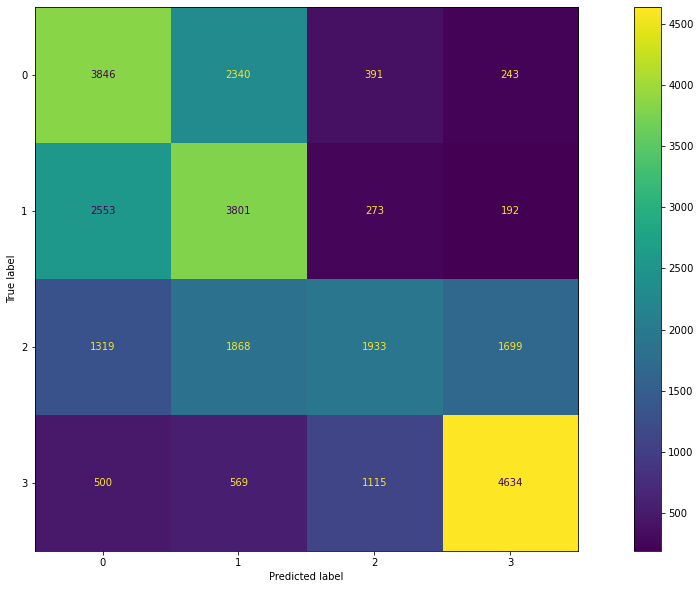

In [110]:
# confusion matrix
# Plotting Confusion Matrix
# REFERENCE: https://stackoverflow.com/questions/61325314/how-to-change-plot-confusion-matrix-default-figure-size-in-sklearn-metrics-packa

from sklearn.metrics import confusion_matrix
# Plotting Confusion Matrix
fig, ax = plt.subplots(figsize=(20, 10))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(est1, X_test, y_test,ax=ax)

In [111]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_new1)
cm

array([[3846, 2340,  391,  243],
       [2553, 3801,  273,  192],
       [1319, 1868, 1933, 1699],
       [ 500,  569, 1115, 4634]], dtype=int64)

<br><b>0-20: 0 </b></br>
<br><b>21-30: 1 </b></br>
<br><b>30 - 60: 2 </b></br>
<br><b>60+: 3 </b></br>
# Observations
<br><b>1: Model is bad in predicting label(30-60) and okay for class labels(0-20 and 21-30).</b></br>
<br><b>2: Model is good in predicting label(60+) and few times misclassifies into other labels</b></br>
<br><b>3: Model gets confused between labels (0-20) days stay with (21-30) days stay</b></br>

# Hyper Tuning with top 15 features only

In [112]:
rf_parameters, rf_ht_score,results=hypertuning_rscv(est,random_grid,7,X_train_rf,y_train_rf)

In [113]:
rf_parameters

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [114]:
results[['param_max_depth','param_min_samples_leaf','param_n_estimators','param_criterion','mean_train_score','mean_test_score']]

,param_max_depth,param_min_samples_leaf,param_n_estimators,param_criterion,mean_train_score,mean_test_score
0,25,2,300,entropy,0.987926,0.498454
1,75,4,50,entropy,0.771147,0.508060
2,12,1,100,entropy,0.617567,0.515331
3,50,1,100,entropy,0.999955,0.489973
4,75,4,10,entropy,0.731873,0.497183
5,6,2,5,entropy,0.493122,0.490058
6,8,3,200,gini,0.524574,0.510357


In [115]:
rf_ht_score

0.5153311322256329

In [116]:
est2=RandomForestClassifier(n_jobs=-1, bootstrap=True, criterion='entropy', max_depth= 12,min_samples_leaf= 1, n_estimators= 100)

In [117]:
est2.fit(X_train_rf,y_train_rf)

RandomForestClassifier(criterion='entropy', max_depth=12, n_jobs=-1)

In [118]:
# predict
y_pred_new2=est2.predict(X_test_rf) # predicting the data on test data points
y_pred_new2 # prediction values

array([3, 1, 0, ..., 3, 2, 1])

In [119]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_rf,y_pred_new2)
cm

array([[4204, 2132,  284,  200],
       [2863, 3661,  144,  151],
       [1477, 1803, 1692, 1847],
       [ 638,  568, 1011, 4601]], dtype=int64)

# Observations
<br><b>1: Model is good in predicting label(60+) and few times misclassifies into other labels</b></br>
<br><b>2: Model is bad in predicting rest of class labels</b></br>

In [120]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test_rf,y_pred_new2)

0.5190643789411937

# Accuracy is nearly 52 % with top 15 features hypertuning

# Summary

##### 1: random forest with all features with HyperParameter Tuning: 52.63%
##### 3: Random Forest with top 15 features: 49%
##### 4: Random Forest with top 15 features with HyperParameter Tuning: 51%

# Questions

<br><b>1: Is the relationship significant ?</b></br>
<br>Based on feature_importances_ property sklearn gives for Random Forest we get features with a score suggesting their importance for predicting target output . High score means more useful in prediction. </br>

<br><b>2: Is there any multicollinearity in the model?</b></br>
<br>There is multicollinearity between the features.</br>
<br><b>For random Forest</b></br>
<br>There is no issue of multicollinearity because Random Forest uses bootstrap sampling and feature sampling, i.e row sampling and column sampling. Therefore Random Forest is not affected by multicollinearity that much since it is picking different set of features for different models and of course every model sees a different set of data points.</br>

<br><b>3: In the multivariate models are predictor variables independent of all the other predictor variables? </b></br>
<br>No, because Random Forest handles correlated variables due to bagging.</br>

<br><b>4: Are any model assumptions violated? </b></br>
<br>No model assumptions were violated here because Random Forest has no assumptions and as the models performed as expected in classifying the data into multiclass classes.</br>


<br><b>5: In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model?</b></br>
<br>For Random Forest there is a property feature_importances_ which tells which variables are important with a score. A feature with high score is more useful for predicting target variable. In my case Admission_Deposit,Visitors with Patient, Available extra room in Hospital are the most significant variables.</br>

<br><b>6: Does the model makes sense?</b></br>
<br><b>Random Forest</b></br>
<br><b>1:</b>Random forests is great with high dimensional data since we are working with subsets of data. It is faster to train than decision trees because we are working only on a subset of features in this model, so we can easily work with hundreds of features. </br>
<br><b>2:</b>In Random Forest which is low bias(makes less assumptions about target variable) and high variance as input to random forest(which is Decision Tree) but with column and row sampling and finally aggregation we get low bias and low variance. We got accuracy of 49% and then when we applied Hyperparameter Tuning (RandomSearchCV) we got even better accuracy of nearly 52%.</br>

<br><b>7:Does regularization help?</b></br>
<br>Regularization is used to avoid overfitting problem.It is applied to a cost function that is used to update values of parameters. 
</br>
<br>In Random Forest to avoid overfitting we need to limit the tree depth at a certain value to not grow further. Hence you can use maximum depth parameter as regularization paramter.</br>

<br><b>8: Which independent variables are significant?</b></br>
<br> Based on the property sklearn provides for Random Forest feature_importances_ we can come to know which features is highly significant and hence at the root of the node(reduction in Entropy or Gini Impurity).</br>
<br> In my case Admission_Deposit and Visitors with patient are the 2 most significant variables.</br>

<br><b>9:Which hyperparameters are important?</b></br>
<br>For Random Forest max_depth is very important i.e.maximum depth of a tree to grow because if we keep on growing the tree then it lead to overfitting problem  and best value of this was calculated using RandomSearchCV.</br>

# Logistic Regression

#### As Logistic Regression is affected by multicollinearity between features hence removing the multicollinear features.

# Finding Multicollinearity between independent variables
<br>Using VIF(Variable Inflation Factors) determines the strength of the correlation between the independent variables.<br> 
<br>It is predicted by taking a variable and regressing it against every other variable.</br>
<br>VIF= 1/(1-R^2) </br>
<br>R^2 value is determined to find out how well an independent variable is described by the other independent variables.</br>
<br>A high value of R^2 means that the variable is highly correlated with the other variables</br>
<br>So, the closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable</br>

In [121]:
X.columns

Index(['Available Extra Rooms in Hospital', 'Bed Grade',
       'Visitors with Patient', 'Admission_Deposit', 'Hospital_type_code_a',
       'Hospital_type_code_b', 'Hospital_type_code_c', 'City_Code_Hospital_1',
       'City_Code_Hospital_2', 'City_Code_Hospital_3', 'City_Code_Hospital_5',
       'City_Code_Hospital_6', 'City_Code_Hospital_7', 'City_Code_Hospital_9',
       'Hospital_region_code_X', 'Hospital_region_code_Y',
       'Department_anesthesia', 'Department_gynecology',
       'Department_radiotherapy', 'Ward_Type_Q', 'Ward_Type_R', 'Ward_Type_S',
       'Ward_Facility_Code_B', 'Ward_Facility_Code_C', 'Ward_Facility_Code_D',
       'Ward_Facility_Code_E', 'Ward_Facility_Code_F',
       'Type of Admission_Emergency', 'Type of Admission_Urgent', 'Severity',
       'Mid_Age', 'Bill_per_patient'],
      dtype='object')

In [122]:
# Reference: https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [123]:
calc_vif(X)

,variables,VIF
0,Available Extra Rooms in Hospital,1.293753
1,Bed Grade,1.210275
2,Visitors with Patient,1.117921
3,Admission_Deposit,1.126020
4,Hospital_type_code_a,3.620418
5,Hospital_type_code_b,10.384588
6,Hospital_type_code_c,5.407481
7,City_Code_Hospital_1,inf
8,City_Code_Hospital_2,inf
9,City_Code_Hospital_3,19.722121


<br>VIF starts at 1 and has no upper limit</br>
<br>VIF = 1, no correlation between the independent variable and the other variables</br>
<br>VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others</br>

So inf means infinity suggesting R^2 is 1 so very very high correlated with other variables. So need to drop features having values more than 5.

In [124]:
# Reference: https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num
# Lets first convert the features into standarization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_std=sc.fit_transform(X.values) # This converts column names into index numbers 0,1....
df=pd.DataFrame(data=X_std,index=X.index, columns=X.columns) # to get column names as original column names and not index
df.head()

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,City_Code_Hospital_1,City_Code_Hospital_2,City_Code_Hospital_3,...,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Emergency,Type of Admission_Urgent,Severity,Mid_Age,Bill_per_patient
0,0.740210,-0.725618,0.122535,-0.423074,-0.878579,-0.538077,2.413220,-0.450738,-0.453238,-0.3336,...,-0.357877,-0.344072,-0.453238,-0.450738,1.356072,1.321588,-0.412317,0.087538,0.409619,-0.279599
1,0.740210,1.545154,-0.738119,0.115912,-0.878579,1.858470,-0.414384,-0.450738,-0.453238,-0.3336,...,-0.357877,-0.344072,-0.453238,-0.450738,1.356072,-0.756665,-0.412317,-1.419586,-0.618077,-0.738460
2,-0.978398,0.409768,-0.738119,0.052971,-0.878579,1.858470,-0.414384,-0.450738,2.206346,-0.3336,...,-0.357877,-0.344072,2.206346,-0.450738,-0.737424,1.321588,-0.412317,-1.419586,-1.131925,-0.148309
3,0.740210,-0.725618,-0.738119,0.106160,1.138202,-0.538077,-0.414384,-0.450738,-0.453238,-0.3336,...,-0.357877,2.906366,-0.453238,-0.450738,-0.737424,1.321588,-0.412317,-1.419586,-0.104229,-0.135772
4,-0.119094,-0.725618,-0.738119,-0.727139,-0.878579,-0.538077,-0.414384,-0.450738,-0.453238,-0.3336,...,-0.357877,-0.344072,-0.453238,-0.450738,1.356072,1.321588,-0.412317,0.087538,-0.618077,0.531608


In [125]:
calc_vif(df)

,variables,VIF
0,Available Extra Rooms in Hospital,1.293753
1,Bed Grade,1.210275
2,Visitors with Patient,1.117921
3,Admission_Deposit,1.125998
4,Hospital_type_code_a,3.620418
5,Hospital_type_code_b,10.384588
6,Hospital_type_code_c,5.407481
7,City_Code_Hospital_1,inf
8,City_Code_Hospital_2,inf
9,City_Code_Hospital_3,inf


In [126]:
# Dropping column City_Code_Hospital_1
# Reference: https://stackoverflow.com/questions/20297317/python-dataframe-pandas-drop-column-using-int
cols = [7]
df.drop(df.columns[cols],axis=1,inplace=True)

In [127]:
calc_vif(df)

,variables,VIF
0,Available Extra Rooms in Hospital,1.293743
1,Bed Grade,1.210275
2,Visitors with Patient,1.117921
3,Admission_Deposit,1.125996
4,Hospital_type_code_a,3.620418
5,Hospital_type_code_b,10.384588
6,Hospital_type_code_c,5.407481
7,City_Code_Hospital_2,inf
8,City_Code_Hospital_3,inf
9,City_Code_Hospital_5,inf


In [128]:
# Again there are few columns dropping column 
cols = [5]
df.drop(df.columns[cols],axis=1,inplace=True)

In [129]:
calc_vif(df)

,variables,VIF
0,Available Extra Rooms in Hospital,1.293587
1,Bed Grade,1.209932
2,Visitors with Patient,1.117145
3,Admission_Deposit,1.123912
4,Hospital_type_code_a,2.589420
5,Hospital_type_code_c,5.390551
6,City_Code_Hospital_2,inf
7,City_Code_Hospital_3,inf
8,City_Code_Hospital_5,inf
9,City_Code_Hospital_6,2.654488


In [130]:

# Again there are few columns dropping column Hospital_type_code_c
cols = [6]
df.drop(df.columns[cols],axis=1,inplace=True)

In [131]:
calc_vif(df)

,variables,VIF
0,Available Extra Rooms in Hospital,1.293593
1,Bed Grade,1.209932
2,Visitors with Patient,1.117145
3,Admission_Deposit,1.123925
4,Hospital_type_code_a,2.589420
5,Hospital_type_code_c,5.390551
6,City_Code_Hospital_3,inf
7,City_Code_Hospital_5,inf
8,City_Code_Hospital_6,2.654488
9,City_Code_Hospital_7,inf


In [132]:

# Again there are few columns dropping column Ward_Type_S
cols = [16]
df.drop(df.columns[cols],axis=1,inplace=True)

In [133]:
calc_vif(df)

,variables,VIF
0,Available Extra Rooms in Hospital,1.274185
1,Bed Grade,1.209549
2,Visitors with Patient,1.116291
3,Admission_Deposit,1.123878
4,Hospital_type_code_a,2.584093
5,Hospital_type_code_c,5.370695
6,City_Code_Hospital_3,inf
7,City_Code_Hospital_5,inf
8,City_Code_Hospital_6,2.642549
9,City_Code_Hospital_7,inf


In [134]:
cols = [21]
df.drop(df.columns[cols],axis=1,inplace=True)

In [135]:
calc_vif(df)

,variables,VIF
0,Available Extra Rooms in Hospital,1.274175
1,Bed Grade,1.209488
2,Visitors with Patient,1.116262
3,Admission_Deposit,1.123044
4,Hospital_type_code_a,2.583420
5,Hospital_type_code_c,5.370695
6,City_Code_Hospital_3,inf
7,City_Code_Hospital_5,inf
8,City_Code_Hospital_6,2.499593
9,City_Code_Hospital_7,inf


In [136]:
cols = [6]
df.drop(df.columns[cols],axis=1,inplace=True)

In [137]:
calc_vif(df)

,variables,VIF
0,Available Extra Rooms in Hospital,1.274206
1,Bed Grade,1.209488
2,Visitors with Patient,1.116262
3,Admission_Deposit,1.123030
4,Hospital_type_code_a,2.583420
5,Hospital_type_code_c,5.370695
6,City_Code_Hospital_5,3.946676
7,City_Code_Hospital_6,2.499593
8,City_Code_Hospital_7,inf
9,City_Code_Hospital_9,3.779629


In [138]:
cols = [10]
df.drop(df.columns[cols],axis=1,inplace=True)

In [139]:
calc_vif(df)

,variables,VIF
0,Available Extra Rooms in Hospital,1.273896
1,Bed Grade,1.209459
2,Visitors with Patient,1.116260
3,Admission_Deposit,1.123024
4,Hospital_type_code_a,2.556462
5,Hospital_type_code_c,1.652393
6,City_Code_Hospital_5,1.919988
7,City_Code_Hospital_6,2.499221
8,City_Code_Hospital_7,inf
9,City_Code_Hospital_9,3.776931


In [140]:
cols = [8]
df.drop(df.columns[cols],axis=1,inplace=True)

In [141]:
calc_vif(df)

,variables,VIF
0,Available Extra Rooms in Hospital,1.273896
1,Bed Grade,1.209459
2,Visitors with Patient,1.116260
3,Admission_Deposit,1.123017
4,Hospital_type_code_a,2.556462
5,Hospital_type_code_c,1.652393
6,City_Code_Hospital_5,1.919988
7,City_Code_Hospital_6,2.499221
8,City_Code_Hospital_9,3.776931
9,Hospital_region_code_Y,inf


In [142]:
cols = [9]
df.drop(df.columns[cols],axis=1,inplace=True)

In [143]:
calc_vif(df)

,variables,VIF
0,Available Extra Rooms in Hospital,1.273896
1,Bed Grade,1.209459
2,Visitors with Patient,1.116260
3,Admission_Deposit,1.123031
4,Hospital_type_code_a,2.556462
5,Hospital_type_code_c,1.652393
6,City_Code_Hospital_5,1.919988
7,City_Code_Hospital_6,2.499221
8,City_Code_Hospital_9,3.776931
9,Department_anesthesia,3.421570


In [144]:
cols = [10]
df.drop(df.columns[cols],axis=1,inplace=True)

In [145]:
calc_vif(df)

,variables,VIF
0,Available Extra Rooms in Hospital,1.273138
1,Bed Grade,1.208983
2,Visitors with Patient,1.116249
3,Admission_Deposit,1.120509
4,Hospital_type_code_a,2.556446
5,Hospital_type_code_c,1.652160
6,City_Code_Hospital_5,1.919874
7,City_Code_Hospital_6,2.498993
8,City_Code_Hospital_9,3.776821
9,Department_anesthesia,1.078640


In [146]:
data_new=df
data_new['Stay']=data['Stay'].values
data_new.head()

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,Hospital_type_code_a,Hospital_type_code_c,City_Code_Hospital_5,City_Code_Hospital_6,City_Code_Hospital_9,Department_anesthesia,...,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_F,Type of Admission_Emergency,Type of Admission_Urgent,Severity,Mid_Age,Bill_per_patient,Stay
0,0.740210,-0.725618,0.122535,-0.423074,-0.878579,2.413220,3.038250,-0.411739,-0.303138,-0.315395,...,-0.357877,-0.344072,-0.453238,1.356072,1.321588,-0.412317,0.087538,0.409619,-0.279599,0
1,0.740210,1.545154,-0.738119,0.115912,-0.878579,-0.414384,-0.329137,-0.411739,-0.303138,-0.315395,...,-0.357877,-0.344072,-0.453238,1.356072,-0.756665,-0.412317,-1.419586,-0.618077,-0.738460,0
2,-0.978398,0.409768,-0.738119,0.052971,-0.878579,-0.414384,-0.329137,-0.411739,-0.303138,-0.315395,...,-0.357877,-0.344072,2.206346,-0.737424,1.321588,-0.412317,-1.419586,-1.131925,-0.148309,0
3,0.740210,-0.725618,-0.738119,0.106160,1.138202,-0.414384,-0.329137,-0.411739,-0.303138,-0.315395,...,-0.357877,2.906366,-0.453238,-0.737424,1.321588,-0.412317,-1.419586,-0.104229,-0.135772,0
4,-0.119094,-0.725618,-0.738119,-0.727139,-0.878579,-0.414384,3.038250,-0.411739,-0.303138,-0.315395,...,-0.357877,-0.344072,-0.453238,1.356072,1.321588,-0.412317,0.087538,-0.618077,0.531608,0


In [147]:
X_lr=data_new.drop('Stay', axis=1)
y_lr=data_new['Stay'].values
X_lr.head()

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,Hospital_type_code_a,Hospital_type_code_c,City_Code_Hospital_5,City_Code_Hospital_6,City_Code_Hospital_9,Department_anesthesia,...,Ward_Type_S,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_F,Type of Admission_Emergency,Type of Admission_Urgent,Severity,Mid_Age,Bill_per_patient
0,0.740210,-0.725618,0.122535,-0.423074,-0.878579,2.413220,3.038250,-0.411739,-0.303138,-0.315395,...,-0.610457,-0.357877,-0.344072,-0.453238,1.356072,1.321588,-0.412317,0.087538,0.409619,-0.279599
1,0.740210,1.545154,-0.738119,0.115912,-0.878579,-0.414384,-0.329137,-0.411739,-0.303138,-0.315395,...,-0.610457,-0.357877,-0.344072,-0.453238,1.356072,-0.756665,-0.412317,-1.419586,-0.618077,-0.738460
2,-0.978398,0.409768,-0.738119,0.052971,-0.878579,-0.414384,-0.329137,-0.411739,-0.303138,-0.315395,...,1.638116,-0.357877,-0.344072,2.206346,-0.737424,1.321588,-0.412317,-1.419586,-1.131925,-0.148309
3,0.740210,-0.725618,-0.738119,0.106160,1.138202,-0.414384,-0.329137,-0.411739,-0.303138,-0.315395,...,-0.610457,-0.357877,2.906366,-0.453238,-0.737424,1.321588,-0.412317,-1.419586,-0.104229,-0.135772
4,-0.119094,-0.725618,-0.738119,-0.727139,-0.878579,-0.414384,3.038250,-0.411739,-0.303138,-0.315395,...,1.638116,-0.357877,-0.344072,-0.453238,1.356072,1.321588,-0.412317,0.087538,-0.618077,0.531608


In [148]:
# train cv test split
from sklearn.model_selection import train_test_split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.33, stratify=y_lr)
#X_train_df, X_cv, y_train_df, y_cv = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train)                              

In [149]:
print("Number of train data points",X_train_lr.shape[0])
print("Number of test data points",X_test_lr.shape[0])

Number of train data points 73099
Number of test data points 36004


In [150]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_lr, y_train_lr)

In [151]:
# getting feature importance 
importance=clf.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'%(i,v))

Feature: 0, Score: 0.13523
Feature: 1, Score: 0.13338
Feature: 2, Score: -1.24269
Feature: 3, Score: -0.07367
Feature: 4, Score: 0.03102
Feature: 5, Score: -0.05177
Feature: 6, Score: 0.03810
Feature: 7, Score: -0.06500
Feature: 8, Score: 0.09253
Feature: 9, Score: 0.09057
Feature: 10, Score: 0.02771
Feature: 11, Score: -0.22513
Feature: 12, Score: -0.34730
Feature: 13, Score: -0.09400
Feature: 14, Score: 0.15819
Feature: 15, Score: -0.16138
Feature: 16, Score: -0.03410
Feature: 17, Score: 0.26075
Feature: 18, Score: 0.09060
Feature: 19, Score: -0.19975
Feature: 20, Score: -0.09591
Feature: 21, Score: -0.02187


### Type_of_Admission_Emergency, Severity, Visitor_with_patient, Ward_Type_R, Ward_S, Ward_Facility_Code_C and Ward_Facility_Code_D are features are most important in prediction of target.

In [152]:
# Weight vectors in logistic regression can tell which about feature importance
print(clf.coef_)
print(clf.intercept_)

[[ 1.35226101e-01  1.33380271e-01 -1.24268830e+00 -7.36685529e-02
   3.10223739e-02 -5.17715263e-02  3.81002698e-02 -6.49985794e-02
   9.25349572e-02  9.05711474e-02  2.77117320e-02 -2.25131703e-01
  -3.47301700e-01 -9.40028375e-02  1.58185215e-01 -1.61379925e-01
  -3.40996973e-02  2.60746829e-01  9.05970998e-02 -1.99748828e-01
  -9.59127764e-02 -2.18658355e-02]
 [ 1.93943146e-01 -1.30158854e-01 -1.24057729e+00  1.23881293e-01
   4.97262357e-02 -3.41043318e-02  3.00003240e-02  2.45713399e-05
   1.39014387e-02  5.74327412e-02 -1.55927349e-03 -2.35431429e-01
  -4.45590428e-01 -3.50541164e-02 -1.05262349e-02 -8.45948275e-02
  -7.69135246e-02 -5.32998968e-02 -3.88394139e-03 -5.89962682e-02
   3.40848353e-03 -7.93323259e-02]
 [-8.72336088e-02 -4.76718266e-03  7.13120073e-01  5.29891796e-03
  -1.39589334e-02  1.94993657e-02 -9.87049064e-03  3.65045747e-02
  -2.68045366e-02 -2.58862748e-02 -7.82145019e-03  9.17100611e-02
   1.55745334e-01  4.61306567e-02 -1.09721724e-02  3.76745288e-02
   1.7

##### Weight vectors in Logistic Regression can tell you about feature importance. Here as we have 11 classes(categories) so for each feature it will have some weight which will contribute for a given class prediction.

In [153]:
y_pred2=clf.predict(X_test_lr)


In [154]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_lr,y_pred2)

0.4969447839128986

### Accuracy is nearly 50% which is bad.

In [155]:
# Trying the Hyperparameter Tuning for Logistic Regression
lr=LogisticRegression(n_jobs=-1)
random_grid_1={'penalty':['l1', 'l2', 'elasticnet'],
            'C':[0.0001,0.001,0.01,0.1,1,10,25,50,100,150,300,500],
            'tol':[0.00001,0.0001,0.001,0.01,0.5,0.1,1,10],
             'solver':['newton-cg','sag','saga'],
             }

In [156]:
# Creating a function 
def hypertuning_lrcv(lr,random_grid_1,nbr_iter,X,y):
    lrmsearch=RandomizedSearchCV(lr,param_distributions=random_grid_1,n_jobs=-1,n_iter=nbr_iter,cv=3,return_train_score=True)
    lrmsearch.fit(X_train_lr,y_train_lr)  # Fitting the RandomizedSearchCV on data
    ht_params=lrmsearch.best_params_ # Getting best parameters 
    ht_score=lrmsearch.best_score_ # Getting Score of randomziedSearchCV
    results_lr=pd.DataFrame(lrmsearch.cv_results_)
    return ht_params,ht_score,results_lr

In [157]:
lr_parameters, lr_ht_score,results_lr=hypertuning_lrcv(lr,random_grid_1,5,X_train_lr,y_train_lr)

In [158]:
results_lr[['param_solver','param_penalty','param_C','mean_train_score','mean_test_score']]

,param_solver,param_penalty,param_C,mean_train_score,mean_test_score
0,newton-cg,elasticnet,1,NaN,NaN
1,sag,l1,1,NaN,NaN
2,newton-cg,elasticnet,1,NaN,NaN
3,saga,l2,100,0.493365,0.492182
4,newton-cg,l2,0.1,0.493379,0.491949


In [160]:
# Here we are getting score for only 5 iteration only 
# here mean train score and mean test score is same nearly for all sets of parameters so no overfitting. 

In [161]:
lr_parameters

{'tol': 0.01, 'solver': 'saga', 'penalty': 'l2', 'C': 100}

In [162]:
 lr_ht_score

0.4921818355899

In [163]:
# creating again new object classifier
classifier_lr=LogisticRegression(n_jobs=-1,solver='saga',penalty='l2',C=100, tol=0.01).fit(X_train_lr,y_train_lr)

In [164]:
y_pred3=classifier_lr.predict(X_test_lr)

In [165]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_lr,y_pred3)

0.4966670369958893

# Accuracy is 50 % due to HyperParameter Tuning but it is not increased at all much.

In [167]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_lr,y_pred3)
cm

array([[4616, 2669, 1342,  375],
       [2927, 4428, 1405,  241],
       [1537, 2093, 2760, 2611],
       [ 612,  609, 1701, 6078]], dtype=int64)

# Observations
##### 0-20: 0
##### 21-30: 1
##### 30-60: 2
###### 60+: 3
    
<br>Here we can see that model fairly well predicts class labels (60+)</br>
<br>Model predicts bad on class label (31-60).</br>
<br>Model predicts okay on rest of the class labels</br>

In [176]:
X_lr.head()

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,City_Code_Hospital_9,Ward_Type_R,Ward_Type_S,Ward_Facility_Code_B,Ward_Facility_Code_D,Ward_Facility_Code_F,Type of Admission_Urgent,Severity,Mid_Age,Bill_per_patient
0,0.740210,-0.725618,0.122535,-0.303138,-0.813706,-0.610457,-0.357877,-0.453238,1.356072,-0.412317,0.087538,0.409619,-0.279599
1,0.740210,1.545154,-0.738119,-0.303138,1.228946,-0.610457,-0.357877,-0.453238,1.356072,-0.412317,-1.419586,-0.618077,-0.738460
2,-0.978398,0.409768,-0.738119,-0.303138,-0.813706,1.638116,-0.357877,2.206346,-0.737424,-0.412317,-1.419586,-1.131925,-0.148309
3,0.740210,-0.725618,-0.738119,-0.303138,-0.813706,-0.610457,-0.357877,-0.453238,-0.737424,-0.412317,-1.419586,-0.104229,-0.135772
4,-0.119094,-0.725618,-0.738119,-0.303138,-0.813706,1.638116,-0.357877,-0.453238,1.356072,-0.412317,0.087538,-0.618077,0.531608


In [177]:
df=X_lr

In [178]:
df.shape

(109103, 13)

In [198]:
df.shape

(109092, 12)

In [199]:
# train cv test split
from sklearn.model_selection import train_test_split
X_train_lrvad, X_test_lrvad, y_train_lrvad, y_test_lrvad = train_test_split(df, y_lr, test_size=0.33, stratify=y_lr)

In [200]:
from sklearn.linear_model import LogisticRegression
clfvad = LogisticRegression(random_state=0).fit(X_train_lrvad, y_train_lrvad)

In [201]:
# getting feature importance 
importance=clfvad.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'%(i,v))

Feature: 0, Score: 0.19052
Feature: 1, Score: 0.14557
Feature: 2, Score: -1.18244
Feature: 3, Score: 0.07516
Feature: 4, Score: -0.20635
Feature: 5, Score: 0.04242
Feature: 6, Score: 0.23116
Feature: 7, Score: 0.01299
Feature: 8, Score: 0.23166
Feature: 9, Score: -0.19201
Feature: 10, Score: -0.09019
Feature: 11, Score: -0.04505


In [202]:
y_pred2=clfvad.predict(X_test_lrvad)


In [203]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_lrvad,y_pred2)

0.482458820588317

In [204]:
lr_parameters, lr_ht_score,results_lr=hypertuning_lrcv(lr,random_grid_1,3,X_train_lrvad,y_train_lrvad)

In [205]:
results_lr[['param_solver','param_penalty','param_C','mean_train_score','mean_test_score']]

,param_solver,param_penalty,param_C,mean_train_score,mean_test_score
0,saga,l2,25,0.493652,0.491866
1,sag,l2,100,0.496764,0.495697
2,newton-cg,elasticnet,150,NaN,NaN


In [206]:
lr_parameters

{'tol': 0.001, 'solver': 'sag', 'penalty': 'l2', 'C': 100}

In [207]:
classifier_lrvad=LogisticRegression(n_jobs=-1,solver='sag',penalty='l2',C=100, tol=0.001).fit(X_train_lrvad,y_train_lrvad)

In [208]:
y_pred3=classifier_lrvad.predict(X_test_lrvad)

In [209]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_lrvad,y_pred3)
cm

array([[4464, 2802, 1405,  331],
       [2991, 4218, 1533,  258],
       [1606, 2034, 2881, 2478],
       [ 616,  695, 1880, 5809]], dtype=int64)

# Model predicts fairly well class labels (60+) 

In [210]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_lrvad,y_pred3)

0.4825421516068998

# Accuracy is 48 % with top 10 features hyperparameter Tuning

# Questions

<br><b>1: Is the relationship significant ?</b></br>
<br> Since this is multiclass classification problem I tried using p value but we can't use p value for multi class classification so using the sklearn property model_coef[0] i got feature importance value for each feature. Also, in logistic regression the weight vectors for ech class get some values which tells which feature is more importance in prediction the given class label.</br>

<br><b>2: Is there any multicollinearity in the model?</b></br>
<br>There is multicollinearity between the features.</br>
<br>Logistic Regression gets affected by multicollinearity points hence I have used VIF(Variable Inflation factors) to remove correlated features and get all non collinear features for model building </br>

<br><b>3: In the multivariate models are predictor variables independent of all the other predictor variables</b></br>
<br>Yes, through the concept of VIF(Variable Inflation factors) I have removed the features dependent on other features.</br>
    

<br><b>4: Are any model assumptions violated? </b></br>
<br>No model assumptions were violated here as the models performed as expected in classifying the data into multiclass classes.</br>

<br><b>5: In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model?</b></br>
<br>Visitors with patient, Ward_Type_Q and Type_of_Admission_Urgent_Situation features are most important in prediction of target.</br>

<br><b>6: Does the model makes sense?</b></br>

<br><b> Logistic Regression </b></br>
<br>Logistic Regression works well with large dataset hence I selected it but it gets greatly affected by multicollinearity and hence we need to remove collinearity between features after it gave 49% acuracy. But on Hyperparameter Tuning it gave a accuracy of 49% resulting into no change.</br>

<br><b>7:Does regularization help?</b></br>
<br>Regularization is used to avoid overfitting problem.It is applied to a cost function that is used to update values of parameters. Since we are not trying to predict the correct value for the feature in Decision tree then we don't prevent overfitting by changing the value of feature.</br>
<br>Logistic Regression can be regularization is useful because to avoid overfitting the data but again C determines the strength of regularization term if C is high (C=1/lambda) meaning lambda is 0 resulting main focus is given to loss term in logistic regression tending to overfitting. If C is low meaning lambda is high and more focus is given to regularization term tending to underfit and less focus to loss term(to reduce error). </br>
<br>Also, L1 regularization creates sparsity i.e if regularization term is given more focus it tends to minimize W^2 (squared) term very much to get weight vectors to features to 0 and as most features will be 0 it will lead to 0. </br>
<br> Although in my case it doesn't help </br>

<br><b>8: Which independent variables are significant?</b></br>
<br>In logistic regression weight vectors can tell which features are important.</br>
<br>Also by property of Logistic Regression model.coef[0] we can come to know the features worth.</br>
<br> Visitor with Patient,Ward_Type_Q and Type_of_Admission_Urgent_Situation are most significant variables.</br>
<br> Since it is multi class we can't use p value.</br>

<br><b>9:Which hyperparameters are important?</b></br>
<br>For Logistic regression C is very important and was calculated using randomSearchCV.It is described in question 7 why C is important in Logistic Regression.</br>

# LSTM

In [92]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [93]:
X_train

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,City_Code_Hospital_1,City_Code_Hospital_2,City_Code_Hospital_3,...,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Emergency,Type of Admission_Urgent,Severity,Mid_Age,Bill_per_patient
2800,0.083333,1,0.09375,0.316898,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,75,0.044208
26495,0.083333,2,0.12500,0.294961,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,55,0.091548
8158,0.125000,3,0.06250,0.607298,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,35,0.065451
24599,0.083333,2,0.12500,0.371199,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,55,0.019148
657,0.125000,2,0.06250,0.430278,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,55,0.022196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,0.125000,3,0.31250,0.133905,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,10,0.220467
8254,0.166667,1,0.06250,0.311034,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,45,0.043429
4500,0.250000,2,0.25000,0.303215,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,90,0.041002
17118,0.166667,1,0.12500,0.442441,0,1,0,0,1,0,...,0,0,1,0,0,1,0,2,10,0.088214


In [94]:
# Adding the 3 rd dimension (Data_rows,features,1)
X_train_c=np.expand_dims(X_train, axis=2)
X_test_c=np.expand_dims(X_test,axis=2)

In [95]:
max_length=X_train_c.shape[1]

In [96]:
X_train_c.shape

(81825, 32, 1)

In [97]:
# Model 3 Building
tensorflow.keras.backend.clear_session()
init = tensorflow.keras.initializers.he_normal()
regularizer = tensorflow.keras.regularizers.l2(0.05)

from tensorflow.keras.layers import LSTM, Flatten, concatenate, Dense, Conv1D, LeakyReLU,Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(LSTM(256, input_shape=(32,1), return_sequences=True))
model.add(LeakyReLU(alpha=0.5)) 
model.add(LSTM(256, return_sequences=True))
model.add(LeakyReLU(alpha=0.5)) 
model.add(Dropout(0.4)) 
model.add(LSTM(128, return_sequences=True))
model.add(LeakyReLU(alpha=0.5)) 
model.add(Dropout(0.4)) 
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2)) 
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2)) 
model.add(Dense(units=4,activation='sigmoid'))

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32, 256)           264192    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32, 256)           525312    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 256)           0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 256)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32, 128)           197120    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 128)           0

In [100]:
# compile the model
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_acc', patience=4, verbose=1,mode='max')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [101]:

history = model.fit(X_train_c,y_train,epochs=30,validation_data=(X_test_c,y_test),batch_size=400,verbose=1,callbacks=[earlystop])



Train on 81825 samples, validate on 27276 samples
Epoch 1/30
81825/81825 [==============================] - 651s 8ms/sample - loss: 1.1052 - acc: 0.4856 - val_loss: 1.0989 - val_acc: 0.4887
Epoch 2/30
81825/81825 [==============================] - 609s 7ms/sample - loss: 1.1028 - acc: 0.4868 - val_loss: 1.1014 - val_acc: 0.4883
Epoch 3/30
81825/81825 [==============================] - 610s 7ms/sample - loss: 1.0957 - acc: 0.4896 - val_loss: 1.0899 - val_acc: 0.4941
Epoch 4/30
81825/81825 [==============================] - 619s 8ms/sample - loss: 1.0868 - acc: 0.4936 - val_loss: 1.0836 - val_acc: 0.4967
Epoch 5/30
81825/81825 [==============================] - 640s 8ms/sample - loss: 1.0863 - acc: 0.4947 - val_loss: 1.0898 - val_acc: 0.4909
Epoch 6/30
81825/81825 [==============================] - 750s 9ms/sample - loss: 1.0846 - acc: 0.4956 - val_loss: 1.0819 - val_acc: 0.4958
Epoch 7/30
81825/81825 [==============================] - 803s 10ms/sample - loss: 1.0793 - acc: 0.4982 - val_

In [1]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "Accuracy"]

x.add_row(["Logistic Regression", 49.6])
x.add_row(["Logistic Regression with Hyperparameter Tuning", 49.67])
x.add_row(["Random Forest", 49.9])
x.add_row(["Random Forest with Hyperparameter Tuning", 52.11])
x.add_row(["Decision Tree", 48.6])
x.add_row(["Decision Tree with Hyperparameter Tuning", 49.66])
x.add_row(["LSTM", 51.5])
print(x)

+------------------------------------------------+----------+
|                     Model                      | Accuracy |
+------------------------------------------------+----------+
|              Logistic Regression               |   49.6   |
| Logistic Regression with Hyperparameter Tuning |  49.67   |
|                 Random Forest                  |   49.9   |
|    Random Forest with Hyperparameter Tuning    |  52.11   |
|                 Decision Tree                  |   48.6   |
|    Decision Tree with Hyperparameter Tuning    |  49.66   |
|                      LSTM                      |   51.5   |
+------------------------------------------------+----------+


# Observations: Random Forest with Hyperparameter Tuning performs best among all the models.